In [1]:
from lib2to3.btm_utils import tokens

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nest_asyncio import apply
from nltk.lm import vocabulary
from pandas.io.sas.sas_constants import dataset_length

C:\Users\Ishara Maduranga\AppData\Local\Temp\ipykernel_16720\3637351966.py:1: DeprecationWarning: lib2to3 package is deprecated and may not be able to parse Python 3.10+
  from lib2to3.btm_utils import tokens


In [2]:
data = pd.read_csv('../artifacts/tripadvisor_extended_1000.csv')

In [3]:
data.tail(20)

,id,tweet,label
7532,7533,"Bad experience! The location was good, but eve...",0
7533,7534,"Average experience. Some things were good, som...",1
7534,7535,"Stayed here for a week, and I must say, this w...",2
7535,7536,"Horrible stay. The AC was broken, and the staf...",0
7536,7537,"Not bad, but I've stayed at better places for ...",1
7537,7538,The noise was unbearable. Couldn’t sleep all n...,0
7538,7539,Totally regret booking this place. Stay away! ...,0
7539,7540,Best experience ever! The hotel ambiance was p...,2
7540,7541,"Fairly comfortable, but I expected a little mo...",1
7541,7542,"Fairly comfortable, but I expected a little mo...",1


In [4]:
## Data Preprocessing 

In [5]:
data.shape

(7552, 3)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
# Remove duplicate rows from the original dataset
data.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print("Updated data shape:", data.shape)
print("Number of duplicates remaining:", data.duplicated().sum())

Updated data shape: (7552, 3)
Number of duplicates remaining: 0


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

id       0
tweet    0
label    0
dtype: int64

In [10]:
### Text Preprocessing

In [11]:
import re
import string

In [12]:
#### Convert uppercase to lower case

In [13]:
data["tweet"].head(5)

0    nice average stayed recently mid-october got g...
1    westin rio mar worth trip friend just returned...
2    okay not great stayed apolo tryp 2 nights pret...
3    good not great stayed friend neri early, thoug...
4    poor customer service poor customer service no...
Name: tweet, dtype: object

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(5)

0    nice average stayed recently mid-october got g...
1    westin rio mar worth trip friend just returned...
2    okay not great stayed apolo tryp 2 nights pret...
3    good not great stayed friend neri early, thoug...
4    poor customer service poor customer service no...
Name: tweet, dtype: object

In [16]:
#### Remove Links

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [18]:
data["tweet"].head(5)

0    nice average stayed recently mid-october got g...
1    westin rio mar worth trip friend just returned...
2    okay not great stayed apolo tryp 2 nights pret...
3    good not great stayed friend neri early, thoug...
4    poor customer service poor customer service no...
Name: tweet, dtype: object

In [19]:
#### Remove Punctuations

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuations (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [22]:
data["tweet"].head(5)

0    nice average stayed recently midoctober got go...
1    westin rio mar worth trip friend just returned...
2    okay not great stayed apolo tryp 2 nights pret...
3    good not great stayed friend neri early though...
4    poor customer service poor customer service no...
Name: tweet, dtype: object

In [23]:
#### Remove Numbers

In [24]:
data["tweet"].tail(10)

7542    enjoyed my time here the pool was clean and th...
7543    enjoyed my time here the pool was clean and th...
7544    bad experience the location was good but every...
7545    best experience ever the hotel ambiance was pe...
7546    bad experience the location was good but every...
7547    the noise was unbearable couldn’t sleep all ni...
7548    totally regret booking this place stay away th...
7549    a reasonable place for a short stay but nothin...
7550    it was fine for a business trip nothing too fa...
7551    not worth the money the rooms smelled bad and ...
Name: tweet, dtype: object

In [25]:
data["tweet"] = data["tweet"].str.replace('\d+','',regex=True)

In [26]:
data["tweet"].tail(10)

7542    enjoyed my time here the pool was clean and th...
7543    enjoyed my time here the pool was clean and th...
7544    bad experience the location was good but every...
7545    best experience ever the hotel ambiance was pe...
7546    bad experience the location was good but every...
7547    the noise was unbearable couldn’t sleep all ni...
7548    totally regret booking this place stay away th...
7549    a reasonable place for a short stay but nothin...
7550    it was fine for a business trip nothing too fa...
7551    not worth the money the rooms smelled bad and ...
Name: tweet, dtype: object

In [27]:
#### Remove Stop Words

In [28]:
!pip install nltk

In [29]:
import nltk

In [30]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [32]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [34]:
data["tweet"].head(5)

0    nice average stayed recently midoctober got go...
1    westin rio mar worth trip friend returned days...
2    okay great stayed apolo tryp nights pretty sta...
3    good great stayed friend neri early thought gr...
4    poor customer service poor customer service re...
Name: tweet, dtype: object

In [35]:
#### Stemming (find same meaning words and replace based word eg: go , goes , gone , going)

In [36]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [37]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [38]:
data["tweet"].head(5)

0    nice averag stay recent midoctob got good deal...
1    westin rio mar worth trip friend return day we...
2    okay great stay apolo tryp night pretti standa...
3    good great stay friend neri earli thought grea...
4    poor custom servic poor custom servic respond ...
Name: tweet, dtype: object

In [39]:
data

,id,tweet,label
0,1,nice averag stay recent midoctob got good deal...,1
1,2,westin rio mar worth trip friend return day we...,2
2,3,okay great stay apolo tryp night pretti standa...,1
3,4,good great stay friend neri earli thought grea...,1
4,5,poor custom servic poor custom servic respond ...,0
...,...,...,...
7547,7548,nois unbear couldn’t sleep night loud music ne...,0
7548,7549,total regret book place stay away pictur onlin...,0
7549,7550,reason place short stay noth rave lobbi look e...,1
7550,7551,fine busi trip noth fanci confer room wellequi...,1


In [40]:
### Building Vacabulary

In [41]:
from  collections import Counter
vocab = Counter()

In [42]:
#vocab.update(['java','python','python','c++'])

In [43]:
#vocab

In [44]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [45]:
vocab

Counter({'room': 17502,
         'hotel': 16450,
         'stay': 9467,
         'nt': 7363,
         'good': 5676,
         'great': 5507,
         'staff': 5147,
         'night': 5086,
         'day': 4647,
         'time': 4630,
         'nice': 4435,
         'servic': 4185,
         'locat': 4169,
         'like': 3668,
         'beach': 3667,
         'place': 3641,
         'resort': 3449,
         'clean': 3426,
         'food': 3378,
         'restaur': 3197,
         'bed': 2902,
         'walk': 2817,
         'pool': 2773,
         'breakfast': 2705,
         'peopl': 2515,
         'realli': 2467,
         'got': 2407,
         'small': 2362,
         'look': 2356,
         'book': 2320,
         'want': 2281,
         'area': 2272,
         'help': 2245,
         'desk': 2172,
         'littl': 2064,
         'need': 2035,
         'check': 2034,
         'price': 2011,
         'bathroom': 2001,
         'make': 1978,
         'ask': 1921,
         'water': 1912,
      

In [46]:
len(vocab)

30056

In [47]:
data.shape

(7552, 3)

In [48]:
tokens = [key for key in vocab if vocab[key]>2]

In [49]:
len(tokens)

8518

In [50]:
def save_vocabulary (lines, filename):
    data = '\n'.join(lines)
    file= open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
    
save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [51]:

## Divide DataSet

In [52]:
x = data['tweet']
y = data['label']

In [53]:
!pip install scikit-learn

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
x_train.shape

(6041,)

In [56]:
x_test.shape

(1511,)

In [57]:
## Vectorization

In [58]:
def vectorizer(ds, vocabulary):
    vectorized_1st = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len (vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_1st.append(sentence_lst)
        
    vectorized_1st_new = np.asarray(vectorized_1st, dtype=np.float32)
    return vectorized_1st_new

In [59]:
vectorized_x_train = vectorizer(x_train, tokens)

In [60]:
#for i in vectorized_x_train[0]:
print("1111111111111")

1111111111111


In [61]:
vectorized_x_test = vectorizer(x_test, tokens)

In [62]:
#for i in vectorized_x_test[0]:
print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


In [63]:
y_train.value_counts()


label
2    2017
1    2014
0    2010
Name: count, dtype: int64

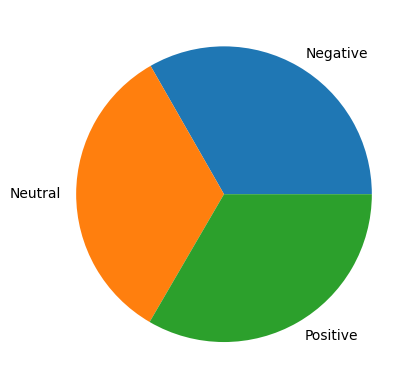

In [64]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1],y_train.value_counts()[2]]), labels=['Negative', 'Neutral','Positive'])
plt.show()

In [65]:
## Handle Imbalanced dataset

In [66]:
!pip install imbalanced-learn

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(6051, 8518) (6051,)


In [68]:
y_train_smote.value_counts()

label
2    2017
1    2017
0    2017
Name: count, dtype: int64

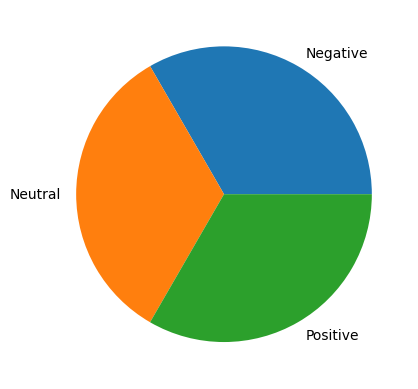

In [69]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1],y_train_smote.value_counts()[2]]), labels=['Negative', 'Neutral','Positive'])
plt.show()

In [70]:
vectorized_x_train_smote

array([[1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3876573 , 0.61234266, 0.61234266, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.7864569 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [71]:
y_train_smote

0       2
1       1
2       2
3       1
4       0
       ..
6046    0
6047    0
6048    1
6049    1
6050    1
Name: label, Length: 6051, dtype: int64

In [72]:
vectorized_x_test

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [73]:
y_test

4345    1
3479    0
6006    2
278     0
4398    2
       ..
508     2
2669    0
5298    2
5270    0
3708    2
Name: label, Length: 1511, dtype: int64

In [74]:
## Model Training and Evaluation

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [76]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# def training_scores(y_act, y_pred):
#     acc = round(accuracy_score(y_act, y_pred), 3)
#     pr = round(precision_score(y_act, y_pred), 3)
#     rec = round(recall_score(y_act, y_pred), 3)
#     f1 = round(f1_score(y_act, y_pred), 3)
#     print(f'Training Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
# def validation_scores(y_act, y_pred):
#     acc = round(accuracy_score(y_act, y_pred), 3)
#     pr = round(precision_score(y_act, y_pred), 3)
#     rec = round(recall_score(y_act, y_pred), 3)
#     f1 = round(f1_score(y_act, y_pred), 3)
#     print(f'Testing Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall {rec}\n\tF1-Score = {f1}')

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)
    print(f'Training Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_act, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'), 3)
    print(f'Testing Scores: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


In [78]:
### Logistic Regression

In [79]:
# lr = LogisticRegression()
# lr.fit(vectorized_x_train_smote,y_train_smote)

In [80]:
# y_train_pred = lr.predict(vectorized_x_train_smote)

In [81]:
# y_train_pred

In [82]:
# y_train_smote

In [83]:
# training_scores(y_train_smote,y_train_pred)

In [84]:
# y_test_pred = lr.predict(vectorized_x_test)

In [85]:
# y_test_pred

In [86]:
# y_test

In [87]:
# validation_scores(y_test,y_test_pred)

In [88]:
   ## Test LogisticRegression

In [89]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores: 
	Accuracy = 0.746
	Precision = 0.746
	Recall = 0.746
	F1-Score = 0.746


In [90]:
## Test Naive Base (MultinomialNB)

In [91]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Accuracy = 0.881
	Precision = 0.882
	Recall = 0.881
	F1-Score = 0.881
Testing Scores: 
	Accuracy = 0.775
	Precision = 0.775
	Recall = 0.775
	F1-Score = 0.774


In [92]:
## Test Decision Tree

In [93]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores: 
	Accuracy = 0.583
	Precision = 0.582
	Recall = 0.583
	F1-Score = 0.582


# Test Random Forest

In [94]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores: 
	Accuracy = 0.726
	Precision = 0.725
	Recall = 0.726
	F1-Score = 0.724


# Test SVC

In [95]:
svc = SVC()
svc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svc.predict(vectorized_x_train_smote)
y_test_pred = svc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores: 
	Accuracy = 0.959
	Precision = 0.959
	Recall = 0.959
	F1-Score = 0.959
Testing Scores: 
	Accuracy = 0.776
	Precision = 0.778
	Recall = 0.776
	F1-Score = 0.777


In [96]:
# import pickle
# with open('../static/model/model_svc.pickle','wb') as file:
#     pickle.dump(svc,file)